In [4]:
import gzip
import json
import pandas as pd

In [3]:
# Read dataset0.json.gz, dataset1.json.gz, dataset2.json.gz ==============================================================
objs=[]
with gzip.open(r"/Users/tangyating/desktop/Group-Project/dataset0.json.gz", 'rt') as f:
    for line in f:
        objs.append(json.loads(line))

'''
objs1=[]
with gzip.open(r"/Users/tangyating/desktop/Group-Project/dataset1.json.gz", 'rt') as f:
    for line in f:
        objs1.append(json.loads(line))
        
objs2=[]
with gzip.open(r"/Users/tangyating/desktop/Group-Project/dataset2.json.gz", 'rt') as f:
    for line in f:
        objs2.append(json.loads(line))
'''

# Read data.info table ====================================================================================================
data = pd.read_csv(r"/Users/tangyating/desktop/Group-Project/data.info")
data = pd.DataFrame(data)


rows = []
for i in range(len(objs)):
    for key1, inner_dict in objs[i].items():
        for key2, inner_list in inner_dict.items():
            for key3, sublist in inner_list.items():
                for subsublist in sublist:
                    rows.append([key1, key2, key3] + subsublist)


df = pd.DataFrame(rows, columns=["transcript_id", "transcript_position", "combined nucleotides", "dwelling_time1", "sd1", "mean1", "dwelling_time2", "sd2", "mean2", "dwelling_time3", "sd3", "mean3"])

df['transcript_position'] = df['transcript_position'].astype(int)
data['transcript_position'] = data['transcript_position'].astype(int)

df = pd.merge(df, data, on=['transcript_id', 'transcript_position'], how='inner')

#df.to_csv('df.csv')


In [4]:
df

,transcript_id,transcript_position,combined nucleotides,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENST00000641834,1693,TTGACAT,0.00418,7.49,108.0,0.00564,10.20,116.0,0.01000,2.01,76.4,ENSG00000167747,0
11027102,ENST00000641834,1693,TTGACAT,0.00664,1.91,109.0,0.00598,12.30,110.0,0.01760,2.61,74.6,ENSG00000167747,0
11027103,ENST00000641834,1693,TTGACAT,0.00721,4.58,105.0,0.00398,6.58,113.0,0.00316,2.28,85.3,ENSG00000167747,0
11027104,ENST00000641834,1693,TTGACAT,0.00266,2.33,109.0,0.00913,10.40,108.0,0.00664,4.44,76.8,ENSG00000167747,0


In [5]:
df = pd.read_pickle('/Users/tangyating/downloads/df.pkl')

agg_functions = {
    'gene_id': 'first',
    'combined nucleotides': 'first',
    'dwelling_time1': 'mean',
    'sd1': 'mean',
    'mean1': 'mean',
    'dwelling_time2': 'mean',
    'sd2': 'mean',
    'mean2': 'mean',
    'dwelling_time3': 'mean',
    'sd3': 'mean',
    'mean3': 'mean',
    'label': 'sum'
}

summary_df = df.groupby(['transcript_id', 'transcript_position']).agg(agg_functions).reset_index()
summary_df['count'] = df.groupby(['transcript_id', 'transcript_position']).size().reset_index(name='count')['count']
summary_df['label_percentage'] = summary_df['label'] / summary_df['count'] * 100
summary_df = summary_df.rename(columns={'label': 'label_sum'})
summary_df['label'] = df['label']

#summary_df.to_csv("summary_df.csv")
summary_df.to_pickle("summary_df.pkl")

In [6]:
summary_df

,transcript_id,transcript_position,gene_id,combined nucleotides,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,label_sum,count,label_percentage,label
0,ENST00000000233,244,ENSG00000004059,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270,0,185,0.0,0
1,ENST00000000233,261,ENSG00000004059,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698,0,172,0.0,0
2,ENST00000000233,316,ENSG00000004059,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324,0,185,0.0,0
3,ENST00000000233,332,ENSG00000004059,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006101,2.236520,89.154000,0,200,0.0,0
4,ENST00000000233,368,ENSG00000004059,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788,0,198,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENST00000641834,1348,ENSG00000167747,GGGACAT,0.009594,3.294164,118.232877,0.007300,4.929726,116.342466,0.006555,4.005616,82.004110,73,73,100.0,0
121834,ENST00000641834,1429,ENSG00000167747,CTGACAC,0.008393,4.511014,110.969565,0.010305,9.105797,114.927536,0.005568,3.644638,80.497101,0,69,0.0,0
121835,ENST00000641834,1531,ENSG00000167747,TGGACAC,0.008161,3.918438,113.968750,0.006877,4.759688,113.562500,0.006410,2.181563,84.190625,64,64,100.0,0
121836,ENST00000641834,1537,ENSG00000167747,CTGACCA,0.008044,3.191228,109.354386,0.007419,6.552982,123.263158,0.006472,2.540877,82.289474,0,57,0.0,0


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

df = pd.read_pickle('/Users/tangyating/downloads/df.pkl')
count_df = df.groupby(['transcript_id', 'transcript_position']).size().reset_index(name='count')
df = df.merge(count_df, on=['transcript_id', 'transcript_position'])


summary_df = pd.read_csv('/Users/tangyating/downloads/summary_df.csv')
#df.to_csv("df.csv")

In [3]:
df

,transcript_id,transcript_position,combined nucleotides,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,gene_id,label,count
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0,185
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0,185
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0,185
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0,185
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENST00000641834,1693,TTGACAT,0.00418,7.49,108.0,0.00564,10.20,116.0,0.01000,2.01,76.4,ENSG00000167747,0,52
11027102,ENST00000641834,1693,TTGACAT,0.00664,1.91,109.0,0.00598,12.30,110.0,0.01760,2.61,74.6,ENSG00000167747,0,52
11027103,ENST00000641834,1693,TTGACAT,0.00721,4.58,105.0,0.00398,6.58,113.0,0.00316,2.28,85.3,ENSG00000167747,0,52
11027104,ENST00000641834,1693,TTGACAT,0.00266,2.33,109.0,0.00913,10.40,108.0,0.00664,4.44,76.8,ENSG00000167747,0,52


In [4]:
summary_df.drop(columns=summary_df.columns[0], axis=1,  inplace=True)

In [5]:
summary_df

,transcript_id,transcript_position,gene_id,combined nucleotides,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,label_sum,count,label_percentage,label
0,ENST00000000233,244,ENSG00000004059,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270,0,185,0.0,0
1,ENST00000000233,261,ENSG00000004059,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698,0,172,0.0,0
2,ENST00000000233,316,ENSG00000004059,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324,0,185,0.0,0
3,ENST00000000233,332,ENSG00000004059,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006101,2.236520,89.154000,0,200,0.0,0
4,ENST00000000233,368,ENSG00000004059,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788,0,198,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENST00000641834,1348,ENSG00000167747,GGGACAT,0.009594,3.294164,118.232877,0.007300,4.929726,116.342466,0.006555,4.005616,82.004110,73,73,100.0,0
121834,ENST00000641834,1429,ENSG00000167747,CTGACAC,0.008393,4.511014,110.969565,0.010305,9.105797,114.927536,0.005568,3.644638,80.497101,0,69,0.0,0
121835,ENST00000641834,1531,ENSG00000167747,TGGACAC,0.008161,3.918438,113.968750,0.006877,4.759688,113.562500,0.006410,2.181563,84.190625,64,64,100.0,0
121836,ENST00000641834,1537,ENSG00000167747,CTGACCA,0.008044,3.191228,109.354386,0.007419,6.552982,123.263158,0.006472,2.540877,82.289474,0,57,0.0,0


In [6]:
# ===============================================================================================================================================================
# Using rus to deal with imbalanced dataset, Train and test data on df ==========================================================================================
# ===============================================================================================================================================================
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

combined = df
label_encoder = LabelEncoder()
combined['transcript_id'] = label_encoder.fit_transform(combined['transcript_id'])
combined['gene_id'] = label_encoder.fit_transform(combined['gene_id'])
combined = pd.get_dummies(combined, columns=['combined nucleotides'], prefix='nucleotide', drop_first=True)


X = combined.drop('label', axis=1)
y = combined['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rus = RandomUnderSampler(random_state=42)
X_usampled, y_usampled = rus.fit_resample(X_train, y_train)
df_usampled = pd.concat([pd.DataFrame(X_usampled, columns=X_train.columns), pd.Series(y_usampled, name='label')], axis=1)

# smote = SMOTE(random_state=42)
# X_ssampled, y_ssampled = smote.fit_resample(X_train, y_train)
# df_ssampled = pd.concat([pd.DataFrame(X_ssampled, columns=X_train.columns), pd.Series(y_ssampled, name='label')], axis=1)

In [16]:
# XG Boost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_usampled, y_usampled)
y_pred_xgb = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
confusion = confusion_matrix(y_test, y_pred_xgb)
classification_report_str = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print("Accuracy_xgb:", accuracy)
print("Confusion Matrix_xgb:\n", confusion)
print("Classification Report_xgb:\n", classification_report_str)
print("ROC AUC Score:", roc_auc_xgb)

Accuracy_xgb: 0.8521761368119117
Confusion Matrix_xgb:
 [[1790185  315322]
 [  10692   89223]]
Classification Report_xgb:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92   2105507
           1       0.22      0.89      0.35     99915

    accuracy                           0.85   2205422
   macro avg       0.61      0.87      0.64   2205422
weighted avg       0.96      0.85      0.89   2205422

ROC AUC Score: 0.8716142183532689


In [20]:
# Random Forest
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_usampled, y_usampled)
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

threshold = 0.5
y_pred_rf_binary = (y_pred_rf >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_rf_binary)
confusion = confusion_matrix(y_test, y_pred_rf_binary)
classification_report_str = classification_report(y_test, y_pred_rf_binary)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Accuracy_rf:", accuracy)
print("Confusion Matrix_rf:\n", confusion)
print("Classification Report_rf:\n", classification_report_str)
print("ROC AUC Score_rf:", roc_auc_rf)


Accuracy_rf: 0.9307325310076711
Confusion Matrix_rf:
 [[1954717  150790]
 [   1974   97941]]
Classification Report_rf:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96   2105507
           1       0.39      0.98      0.56     99915

    accuracy                           0.93   2205422
   macro avg       0.70      0.95      0.76   2205422
weighted avg       0.97      0.93      0.94   2205422

ROC AUC Score_rf: 0.9920753116618689


/Users/tangyating/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


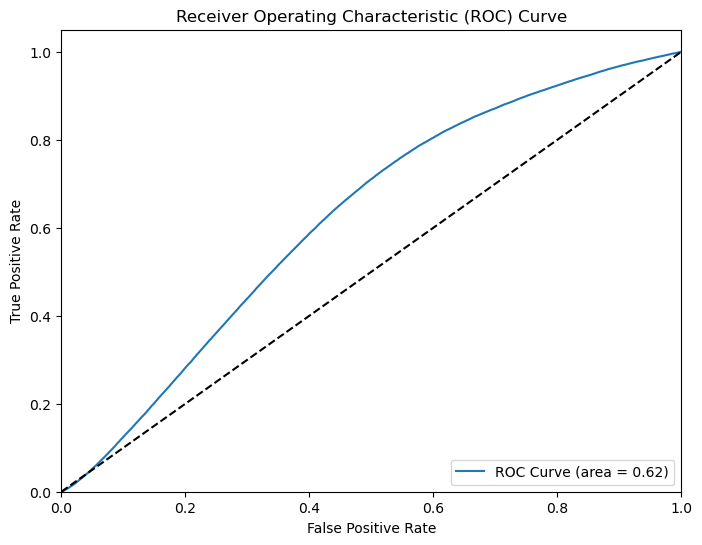

Accuracy_lg: 0.56453322765439
Confusion Matrix_lg:
 [[1181195  924312]
 [  36076   63839]]
Classification Report_lg:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71   2105507
           1       0.06      0.64      0.12     99915

    accuracy                           0.56   2205422
   macro avg       0.52      0.60      0.41   2205422
weighted avg       0.93      0.56      0.68   2205422

ROC AUC Score_lg: 0.621374273407753


In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

logistic_model = LogisticRegression()
logistic_model.fit(X_usampled, y_usampled)
y_pred_lg = logistic_model.predict_proba(X_test)[:, 1]

threshold = 0.5
y_pred_lg_binary = (y_pred_lg >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_lg_binary)
confusion = confusion_matrix(y_test, y_pred_lg_binary)
classification_report_str = classification_report(y_test, y_pred_lg_binary)


roc_auc = roc_auc_score(y_test, y_pred_lg)
fpr, tpr, _ = roc_curve(y_test, y_pred_lg)
precision, recall, _ = precision_recall_curve(y_test, y_pred_lg)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Accuracy_lg:", accuracy)
print("Confusion Matrix_lg:\n", confusion)
print("Classification Report_lg:\n", classification_report_str)
print("ROC AUC Score_lg:", roc_auc)

In [22]:
# Gradient Boosting (XGBoost) for Classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_usampled, y_usampled)

y_pred_gb = xgb_model.predict_proba(X_test)[:, 1]

threshold = 0.5
y_pred_gb_binary = (y_pred_gb >= threshold).astype(int)

roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
accuracy = accuracy_score(y_test, y_pred_gb_binary)
confusion = confusion_matrix(y_test, y_pred_gb_binary)
classification_report_str = classification_report(y_test, y_pred_gb_binary)

print("Accuracy_lg:", accuracy)
print("Confusion Matrix_lg:\n", confusion)
print("Classification Report_lg:\n", classification_report_str)
print("ROC AUC Score of Gradient Boosting (XGBoost):", roc_auc_gb)

Accuracy_lg: 0.8521761368119117
Confusion Matrix_lg:
 [[1790185  315322]
 [  10692   89223]]
Classification Report_lg:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92   2105507
           1       0.22      0.89      0.35     99915

    accuracy                           0.85   2205422
   macro avg       0.61      0.87      0.64   2205422
weighted avg       0.96      0.85      0.89   2205422

ROC AUC Score of Gradient Boosting (XGBoost): 0.9472275540160814


In [8]:
# Neural Networks (Feedforward) for Classification
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve


input_dim = 300

# Assuming X_train and y_train are your training data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,), name='input_layer'),
    tf.keras.layers.Dense(32, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(X_usampled, y_usampled, epochs=10, batch_size=32)

# Predict probabilities for class 1
y_pred_nn = model.predict(X_test).flatten()

threshold = 0.5
y_pred_nn_binary = (y_pred_nn >= threshold).astype(int)

roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
accuracy = accuracy_score(y_test, y_pred_nn_binary)
confusion = confusion_matrix(y_test, y_pred_nn_binary)
classification_report_str = classification_report(y_test, y_pred_nn_binary)

print("Accuracy_lg:", accuracy)
print("Confusion Matrix_lg:\n", confusion)
print("Classification Report_lg:\n", classification_report_str)
print("ROC AUC Score of Neural Networks:", roc_auc_nn)


Epoch 1/10
24979/24979 [==============================] - 30s 1ms/step - loss: 0.7895
Epoch 2/10
24979/24979 [==============================] - 28s 1ms/step - loss: 0.4911
Epoch 3/10
24979/24979 [==============================] - 31s 1ms/step - loss: 0.4574
Epoch 4/10
24979/24979 [==============================] - 29s 1ms/step - loss: 0.4376
Epoch 5/10
24979/24979 [==============================] - 27s 1ms/step - loss: 0.4223
Epoch 6/10
24979/24979 [==============================] - 28s 1ms/step - loss: 0.4125
Epoch 7/10
24979/24979 [==============================] - 28s 1ms/step - loss: 0.4037
Epoch 8/10
24979/24979 [==============================] - 29s 1ms/step - loss: 0.3974
Epoch 9/10
24979/24979 [==============================] - 27s 1ms/step - loss: 0.3899
Epoch 10/10
24979/24979 [==============================] - 28s 1ms/step - loss: 0.3847
Accuracy_lg: 0.7612388921485321
Confusion Matrix_lg:
 [[1588963  516544]
 [  10025   89890]]
Classification Report_lg:
               preci

In [18]:
# Support Vector Machine (SVM) for Classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Assuming X_train and y_train are your training data
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_usampled, y_usampled)

# Predict probabilities for class 1
y_pred_svm = svm_model.predict_proba(X_test)[:, 1]

threshold = 0.5
y_pred_svm_binary = (y_pred_svm >= threshold).astype(int)

roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm_binary)
confusion = confusion_matrix(y_test, y_pred_svm_binary)
classification_report_str = classification_report(y_test, y_pred_svm_binary)

print("Accuracy_lg:", accuracy)
print("Confusion Matrix_lg:\n", confusion)
print("Classification Report_lg:\n", classification_report_str)
print("ROC AUC Score of SVM:", roc_auc_svm)


In [ ]:
ros = RandomOverSampler(random_state=42)
X_osampled, y_osampled = ros.fit_resample(X_train, y_train)
df_osampled = pd.concat([pd.DataFrame(X_osampled, columns=X_train.columns), pd.Series(y_osampled, name='label')], axis=1)

In [14]:
# ===============================================================================================================================================================
# Using rus to deal with imbalanced dataset, Train and test data on summary_df ==================================================================================
# ===============================================================================================================================================================

combined = summary_df
label_encoder = LabelEncoder()
combined['transcript_id'] = label_encoder.fit_transform(combined['transcript_id'])
combined['gene_id'] = label_encoder.fit_transform(combined['gene_id'])
combined = pd.get_dummies(combined, columns=['combined nucleotides'], prefix='nucleotide', drop_first=True)


X = combined.drop('label', axis=1)
y = combined['label']
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rus = RandomUnderSampler(random_state=42)
X_usampled_summary, y_usampled_summary = rus.fit_resample(X_train_summary, y_train_summary)
df_usampled_summary = pd.concat([pd.DataFrame(X_usampled, columns=X_train.columns), pd.Series(y_usampled, name='label')], axis=1)


# smote = SMOTE(random_state=42)
# X_ssampled, y_ssampled = smote.fit_resample(X_train, y_train)
# df_ssampled = pd.concat([pd.DataFrame(X_ssampled, columns=X_train.columns), pd.Series(y_ssampled, name='label')], axis=1)

In [15]:
# XG Boost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_usampled_summary, y_usampled_summary)
y_pred_xgb = xgb_model.predict(X_test_summary)

accuracy = accuracy_score(y_test_summary, y_pred_xgb)
confusion = confusion_matrix(y_test_summary, y_pred_xgb)
classification_report_str = classification_report(y_test_summary, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test_summary, y_pred_xgb)

print("Accuracy_xgb:", accuracy)
print("Confusion Matrix_xgb:\n", confusion)
print("Classification Report_xgb:\n", classification_report_str)
print("ROC AUC Score:", roc_auc_xgb)

Accuracy_xgb: 0.9494418910045962
Confusion Matrix_xgb:
 [[22200  1219]
 [   13   936]]
Classification Report_xgb:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     23419
           1       0.43      0.99      0.60       949

    accuracy                           0.95     24368
   macro avg       0.72      0.97      0.79     24368
weighted avg       0.98      0.95      0.96     24368

ROC AUC Score: 0.9671248085063819


In [20]:
# Random Forest
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_usampled_summary, y_usampled_summary)
y_pred_rf = rf_model.predict_proba(X_test_summary)[:, 1]

threshold = 0.5
y_pred_rf_binary = (y_pred_rf >= threshold).astype(int)

accuracy = accuracy_score(y_test_summary, y_pred_rf_binary)
confusion = confusion_matrix(y_test_summary, y_pred_rf_binary)
classification_report_str = classification_report(y_test_summary, y_pred_rf_binary)
roc_auc_rf_summary = roc_auc_score(y_test_summary, y_pred_rf)

print("Accuracy_rf:", accuracy)
print("Confusion Matrix_rf:\n", confusion)
print("Classification Report_rf:\n", classification_report_str)
print("ROC AUC Score_rf:", roc_auc_rf_summary)

Accuracy_rf: 0.7000574523965857
Confusion Matrix_rf:
 [[16278  7141]
 [  168   781]]
Classification Report_rf:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82     23419
           1       0.10      0.82      0.18       949

    accuracy                           0.70     24368
   macro avg       0.54      0.76      0.50     24368
weighted avg       0.96      0.70      0.79     24368

ROC AUC Score_rf: 0.843773964121159


/Users/tangyating/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


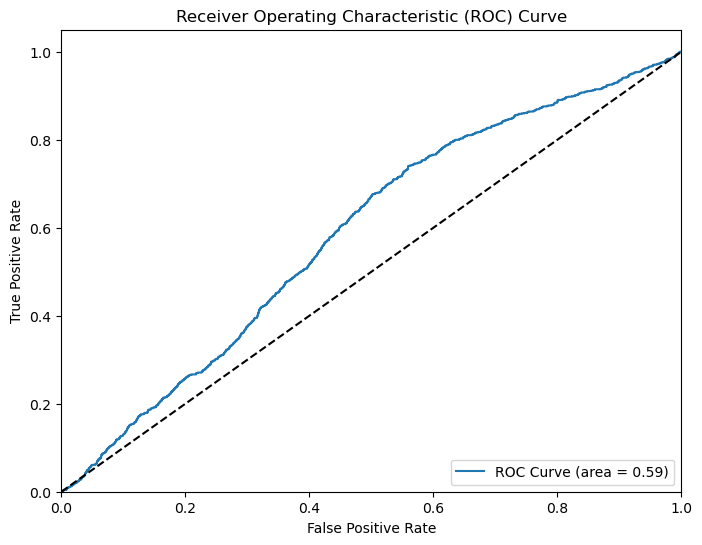

Accuracy_lg: 0.5476854891661195
Confusion Matrix_lg:
 [[12769 10650]
 [  372   577]]
Classification Report_lg:
               precision    recall  f1-score   support

           0       0.97      0.55      0.70     23419
           1       0.05      0.61      0.09       949

    accuracy                           0.55     24368
   macro avg       0.51      0.58      0.40     24368
weighted avg       0.94      0.55      0.68     24368

ROC AUC Score of SVM: 0.5872719776539822


In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

logistic_model = LogisticRegression()
logistic_model.fit(X_usampled_summary, y_usampled_summary)
y_pred_lg = logistic_model.predict_proba(X_test_summary)[:, 1]

threshold = 0.5
y_pred_lg_binary = (y_pred_lg >= threshold).astype(int)

accuracy = accuracy_score(y_test_summary, y_pred_lg_binary)
confusion = confusion_matrix(y_test_summary, y_pred_lg_binary)
classification_report_str = classification_report(y_test_summary, y_pred_lg_binary)
roc_auc_lg_summary = roc_auc_score(y_test_summary, y_pred_lg)
fpr, tpr, _ = roc_curve(y_test_summary, y_pred_lg)
precision, recall, _ = precision_recall_curve(y_test_summary, y_pred_lg)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_rf_summary))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Accuracy_lg:", accuracy)
print("Confusion Matrix_lg:\n", confusion)
print("Classification Report_lg:\n", classification_report_str)
print("ROC AUC Score of SVM:", roc_auc_lg_summary)

In [17]:
# Gradient Boosting (XGBoost) for Classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_usampled_summary, y_usampled_summary)

y_pred_gb = xgb_model.predict_proba(X_test_summary)[:, 1]

threshold = 0.5
y_pred_gb_binary = (y_pred_gb >= threshold).astype(int)

roc_auc_gb_summary = roc_auc_score(y_test_summary, y_pred_gb)
accuracy = accuracy_score(y_test_summary, y_pred_gb_binary)
confusion = confusion_matrix(y_test_summary, y_pred_gb_binary)
classification_report_str = classification_report(y_test_summary, y_pred_gb_binary)

print("Accuracy_lg:", accuracy)
print("Confusion Matrix_lg:\n", confusion)
print("Classification Report_lg:\n", classification_report_str)
print("ROC AUC Score of Gradient Boosting (XGBoost):", roc_auc_gb_summary)

Accuracy_lg: 0.9494418910045962
Confusion Matrix_lg:
 [[22200  1219]
 [   13   936]]
Classification Report_lg:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     23419
           1       0.43      0.99      0.60       949

    accuracy                           0.95     24368
   macro avg       0.72      0.97      0.79     24368
weighted avg       0.98      0.95      0.96     24368

ROC AUC Score of Gradient Boosting (XGBoost): 0.9905700571586542


In [25]:
# Neural Networks (Feedforward) for Classification
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

input_dim = 302

# Assuming X_train and y_train are your training data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,), name='input_layer'),
    tf.keras.layers.Dense(32, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(X_usampled_summary, y_usampled_summary, epochs=10, batch_size=32)

# Predict probabilities for class 1
y_pred_nn_summary = model.predict(X_test_summary).flatten()

threshold = 0.5
y_pred_nn_binary_summary = (y_pred_nn_summary >= threshold).astype(int)

roc_auc_nn_summary = roc_auc_score(y_test_summary, y_pred_nn_summary)
accuracy = accuracy_score(y_test_summary, y_pred_nn_binary_summary)
confusion = confusion_matrix(y_test_summary, y_pred_nn_binary_summary)
classification_report_str = classification_report(y_test_summary, y_pred_nn_binary_summary)

print("Accuracy_lg:", accuracy)
print("Confusion Matrix_lg:\n", confusion)
print("Classification Report_lg:\n", classification_report_str)
print("ROC AUC Score of Neural Networks:", roc_auc_nn_summary)

Epoch 1/10
238/238 [==============================] - 1s 1ms/step - loss: 8.2753
Epoch 2/10
238/238 [==============================] - 0s 1ms/step - loss: 2.0267
Epoch 3/10
238/238 [==============================] - 0s 1ms/step - loss: 1.2698
Epoch 4/10
238/238 [==============================] - 0s 1ms/step - loss: 1.3555
Epoch 5/10
238/238 [==============================] - 0s 1ms/step - loss: 1.3157
Epoch 6/10
238/238 [==============================] - 0s 1ms/step - loss: 1.2335
Epoch 7/10
238/238 [==============================] - 0s 1ms/step - loss: 1.0266
Epoch 8/10
238/238 [==============================] - 0s 1ms/step - loss: 1.2045
Epoch 9/10
238/238 [==============================] - 0s 1ms/step - loss: 1.0462
Epoch 10/10
238/238 [==============================] - 0s 1ms/step - loss: 1.3867
Accuracy_lg: 0.6631648063033486
Confusion Matrix_lg:
 [[15711  7708]
 [  500   449]]
Classification Report_lg:
               precision    recall  f1-score   support

           0       0.9

In [ ]:
ros = RandomOverSampler(random_state=42)
X_osampled, y_osampled = ros.fit_resample(X_train, y_train)
df_osampled = pd.concat([pd.DataFrame(X_osampled, columns=X_train.columns), pd.Series(y_osampled, name='label')], axis=1)